In [3]:
import pandas as pd

def get_data():
    dataframes = []
    
    for p in range(1, 13):
        url = 'http://www.espn.com/nba/statistics/rpm/_/page/{0}'.format(p)
        print(url)
        table = pd.read_html(url, skiprows=0, header=0)[0]
        
        for c in table.columns:
            table[c] = pd.to_numeric(table[c], errors='ignore')    

        table['PLAYER'] = table['NAME'].apply(lambda x: x.split(',')[0])
        table = table.drop(columns=['NAME'])
        
        dataframes.append(table)
    
    return pd.concat(dataframes)


In [5]:
rpm = get_data()

http://www.espn.com/nba/statistics/rpm/_/page/1
http://www.espn.com/nba/statistics/rpm/_/page/2
http://www.espn.com/nba/statistics/rpm/_/page/3
http://www.espn.com/nba/statistics/rpm/_/page/4
http://www.espn.com/nba/statistics/rpm/_/page/5
http://www.espn.com/nba/statistics/rpm/_/page/6
http://www.espn.com/nba/statistics/rpm/_/page/7
http://www.espn.com/nba/statistics/rpm/_/page/8
http://www.espn.com/nba/statistics/rpm/_/page/9
http://www.espn.com/nba/statistics/rpm/_/page/10
http://www.espn.com/nba/statistics/rpm/_/page/11
http://www.espn.com/nba/statistics/rpm/_/page/12


In [6]:
rpm.head()

,RK,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,PLAYER
0,1,HOU,49,37.5,7.88,-0.01,7.87,11.60,James Harden
1,2,OKC,50,36.0,4.36,3.18,7.54,12.14,Paul George
2,3,DEN,51,31.4,4.76,1.97,6.73,9.36,Nikola Jokic
3,4,NO,41,37.0,3.74,2.84,6.58,9.61,Anthony Davis
4,5,GS,41,34.3,6.21,-0.18,6.03,8.12,Stephen Curry


In [29]:
def get_per(year=2019):
    
    tables = []
    for p in range(1, 8):
        if year != 2019:
            url = 'http://insider.espn.com/nba/hollinger/statistics/_/page/{0}/year/{1}'.format(p, year)
        else:
            url = 'http://insider.espn.com/nba/hollinger/statistics/_/page/{0}'.format(p)
        print(url)
        table = pd.read_html(url, skiprows=0, header=1)[0]
        table = table[table['PLAYER'] != 'PLAYER']
        for c in table.columns:
            table[c] = pd.to_numeric(table[c], errors='ignore')    

        table['PLAYER'] = table['PLAYER'].apply(lambda x: x.split(',')[0])
        tables.append(table)
    
    return pd.concat(tables)
        
per = get_per()

http://insider.espn.com/nba/hollinger/statistics/_/page/1
http://insider.espn.com/nba/hollinger/statistics/_/page/2
http://insider.espn.com/nba/hollinger/statistics/_/page/3
http://insider.espn.com/nba/hollinger/statistics/_/page/4
http://insider.espn.com/nba/hollinger/statistics/_/page/5
http://insider.espn.com/nba/hollinger/statistics/_/page/6
http://insider.espn.com/nba/hollinger/statistics/_/page/7


In [31]:
t = 'http://insider.espn.com/nba/hollinger/statistics/_/page/2/year/2011'
data_2011 = get_per(2011)

http://insider.espn.com/nba/hollinger/statistics/_/page/1/year/2011
http://insider.espn.com/nba/hollinger/statistics/_/page/2/year/2011
http://insider.espn.com/nba/hollinger/statistics/_/page/3/year/2011
http://insider.espn.com/nba/hollinger/statistics/_/page/4/year/2011
http://insider.espn.com/nba/hollinger/statistics/_/page/5/year/2011
http://insider.espn.com/nba/hollinger/statistics/_/page/6/year/2011
http://insider.espn.com/nba/hollinger/statistics/_/page/7/year/2011


In [41]:
# 'http://insider.espn.com/nba/hollinger/statistics/_/position/pg/year/2011'


def get_per_pos(year=2019):
    
    tables = []
    for pos in ['pg', 'sg', 'sf', 'pf', 'c']:
        for p in range(1, 5):
            url = 'http://insider.espn.com/nba/hollinger/statistics/_/position/{1}/page/{0}'.format(p, pos)
            
            if year != 2019:
                url = '{0}/year/{1}'.format(url, year)
                
            try:
                table = pd.read_html(url, skiprows=0, header=1)[0]
                table = table[table['PLAYER'] != 'PLAYER']
            except Exception:
                break
            
            print("found:", url)
            for c in table.columns:
                table[c] = pd.to_numeric(table[c], errors='ignore')    
            
            table['POS'] = pos.upper()
            table['PLAYER'] = table['PLAYER'].apply(lambda x: x.split(',')[0])
            tables.append(table)
    
    return pd.concat(tables)
        
per = get_per_pos(2010)

found: http://insider.espn.com/nba/hollinger/statistics/_/position/pg/page/1/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pg/page/2/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sg/page/1/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sg/page/2/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sf/page/1/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sf/page/2/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pf/page/1/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pf/page/2/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/c/page/1/year/2010
found: http://insider.espn.com/nba/hollinger/statistics/_/position/c/page/2/year/2010


found: http://insider.espn.com/nba/hollinger/statistics/_/position/pg/page/1/year/2003
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pg/page/2/year/2003
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sg/page/1/year/2003
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sg/page/2/year/2003
found: http://insider.espn.com/nba/hollinger/statistics/_/position/sf/page/1/year/2003
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pf/page/1/year/2003
found: http://insider.espn.com/nba/hollinger/statistics/_/position/pf/page/2/year/2003
found: http://insider.espn.com/nba/hollinger/statistics/_/position/c/page/1/year/2003
found: http://insider.espn.com/nba/hollinger/statistics/_/position/c/page/2/year/2003


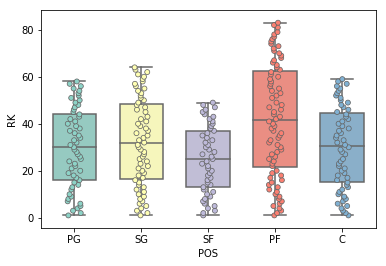

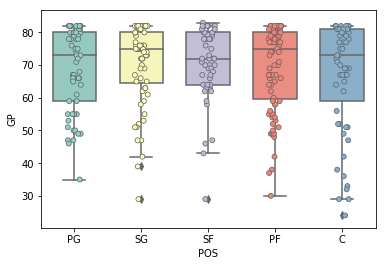

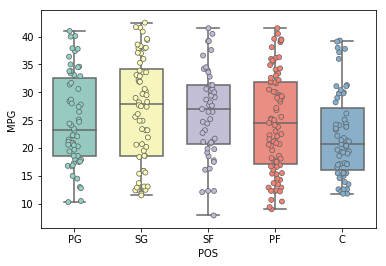

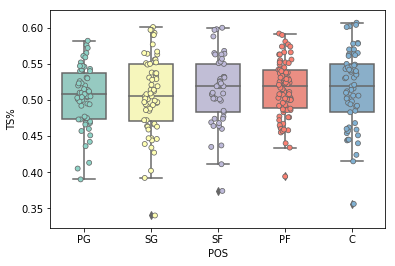

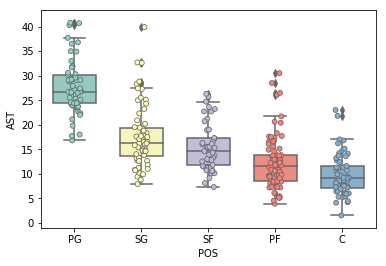

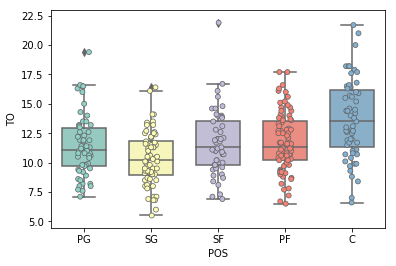

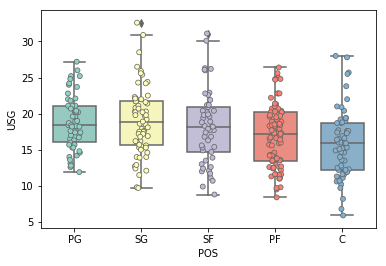

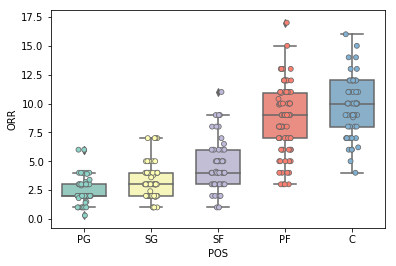

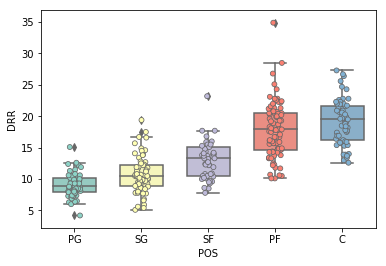

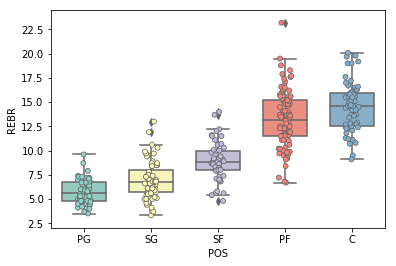

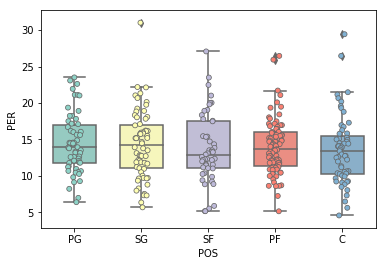

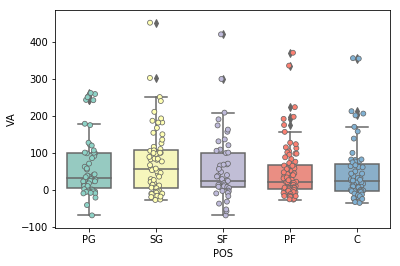

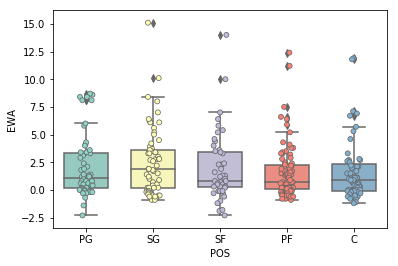

<Figure size 432x288 with 0 Axes>

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = get_per_pos(2003)

def box_and_strip(stat):
    sns.boxplot(x="POS", y=stat, order=['PG', 'SG', 'SF', 'PF', 'C'], 
              data=data, palette="Set3", width=0.65)

    sns.stripplot(x="POS", y=stat, order=['PG', 'SG', 'SF', 'PF', 'C'], 
              data=data, palette="Set3", linewidth=.75)


for col, dtype in dict(per.dtypes).items():
    if dtype != 'object':
        box_and_strip(col)
        plt.figure()

In [12]:
merged = pd.merge(per, rpm, how='left', on='PLAYER')
merged = merged.set_index(drop=True, keys=['PLAYER'])

In [13]:
merged.head()

,RK_x,GP_x,MPG_x,TS%,AST,TO,USG,ORR,DRR,REBR,...,VA,EWA,RK_y,TEAM,GP_y,MPG_y,ORPM,DRPM,RPM,WINS
PLAYER,,,,,,,,,,,,,,,,,,,,,
Anthony Davis,1.0,41,37.0,0.595,14.1,6.5,29.6,9.8,27.5,18.9,...,442.2,14.7,4.0,NO,41.0,37.0,3.74,2.84,6.58,9.61
James Harden,2.0,49,37.5,0.621,18.9,12.8,40.8,2.8,17.9,10.1,...,546.5,18.2,1.0,HOU,49.0,37.5,7.88,-0.01,7.87,11.60
Giannis Antetokounmpo,3.0,48,33.1,0.629,18.9,12.5,31.7,7.6,30.1,19.6,...,425.3,14.2,7.0,MIL,48.0,33.1,2.50,2.95,5.45,8.58
Nikola Jokic,4.0,51,31.4,0.594,27.7,11.2,29.8,10.1,26.7,18.4,...,407.2,13.6,3.0,DEN,51.0,31.4,4.76,1.97,6.73,9.36
Kawhi Leonard,5.0,39,35.1,0.610,11.3,7.4,29.3,4.3,19.8,12.2,...,335.2,11.2,29.0,TOR,39.0,35.1,3.12,-0.07,3.05,5.29


In [14]:
merged = merged.sort_values(by='RPM', ascending=False)

In [15]:
merged.columns

Index(['RK_x', 'GP_x', 'MPG_x', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'VA', 'EWA', 'RK_y', 'TEAM', 'GP_y', 'MPG_y', 'ORPM',
       'DRPM', 'RPM', 'WINS'],
      dtype='object')

In [17]:
merged = merged[['MPG_x', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'VA', 'EWA', 'TEAM', 'ORPM',
       'DRPM', 'RPM', 'WINS']]

In [18]:
merged = merged.rename(columns={'MPG_x': 'MPG'})

In [19]:
cols = list(merged.columns)

In [20]:
cols.insert(1, cols.pop(cols.index('TEAM')))

In [21]:
merged = merged.reindex(columns= cols)

In [25]:
merged[merged.PER.isnull()]

,MPG,TEAM,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,ORPM,DRPM,RPM,WINS
PLAYER,,,,,,,,,,,,,,,,
